In [21]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score


from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

rnd = 8

nrCpu = os.cpu_count()

In [2]:
X_train = pd.read_csv(
    filepath_or_buffer = '../Data/XTrain.csv'
    , delimiter= ';'
    , header=None
)

X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.033821,-0.209758,-0.302467,-0.235037,-0.163307,-0.221327,-0.215671,-0.194085,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.104739,1.769169,3.053373,-0.244665,-0.102623,0.561803,-0.185232,-0.173303,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.114456,-0.188012,0.017137,5.825886,-0.041939,-0.203925,8.642608,-0.233834,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.102142,-0.188012,-0.302467,-0.030163,-0.163307,-0.203925,-0.200518,-0.138334,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.119576,-0.188012,-0.302467,0.267658,-0.102623,-0.203925,-0.268328,-0.237830,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
X_test = pd.read_csv(
    filepath_or_buffer = '../Data/XTest.csv'
    , delimiter= ';'
    , header=None
)

X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.130575,0.029453,0.656345,2.722224,0.079430,-0.203925,2.792454,2.413137,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.085652,9.771866,1.615156,-0.255983,-0.163307,3.642117,-0.198086,-0.217658,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.118183,-0.188012,-0.302467,-0.255983,-0.041939,-0.203925,-0.188706,-0.177195,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.090650,-0.079280,0.336741,-0.242346,-0.041939,-0.029896,-0.252062,-0.257627,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.118611,-0.188012,-0.302467,-0.234912,-0.041939,-0.203925,-0.258322,-0.260112,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
y_train = pd.read_csv(
    filepath_or_buffer = '../Data/yTrain.csv'
    , delimiter= ';'
    , header=None
)

y_train.head()

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


In [5]:
y_test = pd.read_csv(
    filepath_or_buffer = '../Data/yTest.csv'
    , delimiter= ';'
    , header=None
)

y_test.head()

,0
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0


# Scelta del modello e validazione dei parametri

## KNN

In [6]:
%%time

n_neighbors_grid = np.unique(np.logspace(0.5, 1, 20).astype(int))

knn_param_grid = {'n_neighbors':n_neighbors_grid}

score_fnc = balanced_accuracy_score

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rnd)

knn_score = make_scorer(score_fnc)

model_selection_knn = GridSearchCV(
                                estimator = KNeighborsClassifier()
                                , param_grid = knn_param_grid
                                , scoring = knn_score
                                , cv = cv
)

model_selection_knn.fit(X_train, y_train.values.ravel())

knn = model_selection_knn.best_estimator_

knn_Score = model_selection_knn.best_score_

CPU times: total: 38min 20s
Wall time: 25min 35s


In [7]:
knn, knn_Score

(KNeighborsClassifier(n_neighbors=3), 0.9576180779454729)

## Decision Tree Classifier

In [8]:
%%time
ld = (5, 20, 5)
lf = (5, 20, 5)
max_depth_grid = np.linspace(*ld).astype(int)
min_samples_leaf_grid = np.linspace(*lf).astype(int)
param_grid = {'max_depth': max_depth_grid , 'min_samples_leaf': min_samples_leaf_grid}

score_fnc = balanced_accuracy_score

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rnd)

model_selection_DT = GridSearchCV(DecisionTreeClassifier(class_weight = 'balanced')
                               , param_grid = param_grid
                               , scoring = make_scorer(score_fnc)
                               , cv = cv
    )

model_selection_DT.fit(X_train, y_train)
DT = model_selection_DT.best_estimator_
DT_Score = model_selection_DT.best_score_

CPU times: total: 12.7 s
Wall time: 13 s


In [9]:
DT, DT_Score

(DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5),
 1.0)

## SVM

In [10]:
%%time

param_range_gamma = [10e-4, 10e-3, 10e-2]
param_range_C = [10e-3, 10e-2, 10e-1, 10.0]

param_grid = [{'C' : param_range_C
               ,'kernel' : ['linear']},
              {'C' : param_range_C
               ,'gamma': param_range_gamma,
               'kernel' : ['rbf']
              }]

score_fnc = balanced_accuracy_score

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rnd)

model_selection_svm = GridSearchCV(estimator = SVC()
                                    , param_grid = param_grid
                                    , scoring = make_scorer(score_fnc)
                                    , cv = cv
                                  )

model_selection_svm.fit(X_train, y_train.values.ravel())

SVM = model_selection_svm.best_estimator_
SVM_Score = model_selection_svm.best_score_

C:\Users\fsassi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [11]:
SVM, SVM_Score

NameError: name 'SVM' is not defined

## Random Forest

In [12]:
np.linspace(5, 150, 5).astype(int)

array([  5,  41,  77, 113, 150])

In [13]:
np.unique(np.logspace(0.8, 2, 50).astype(int))

array([  6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  23,  24,  25,  27,  28,  30,  32,  34,  36,  38,
        40,  42,  45,  48,  50,  53,  56,  60,  63,  67,  71,  75,  79,
        84,  89,  94, 100])

In [14]:
%%time

ld_rf = (5, 20, 5)
lf_rf = (5, 20, 5)
est_rf = (0.8, 2, 50)

max_depth_grid = np.linspace(*ld_rf).astype(int)
min_samples_leaf_grid = np.linspace(*lf_rf).astype(int)
n_estimators_grid = np.unique(np.logspace(*est_rf).astype(int))

param_grid = {
    'max_depth': max_depth_grid
    , 'min_samples_leaf': min_samples_leaf_grid
    , 'n_estimators': n_estimators_grid
}

score_fnc = balanced_accuracy_score

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rnd)

model_selection_RF = GridSearchCV(RandomForestClassifier(random_state=rnd)
                               , param_grid = param_grid
                               , scoring = make_scorer(score_fnc)
                               , cv = cv
    )

model_selection_RF.fit(X_train, y_train.values.ravel())
RF = model_selection_RF.best_estimator_
RF_Score = model_selection_RF.best_score_

CPU times: total: 1h 17min 32s
Wall time: 1h 17min 46s


In [15]:
RF, RF_Score

(RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=13,
                        random_state=8),
 1.0)

## Confrontro dei modelli testati

In [17]:
def run_experiment(model):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    plot_confusion_matrix(model, X_test, y_test, cmap='GnBu')
    plt.show()
    
    PS = round(precision_score(y_test, y_pred),2)
    RS = round(recall_score(y_test, y_pred),2)
    F1 = round(f1_score(y_test, y_pred),2)
    AS = round(accuracy_score(y_test, y_pred),2)
    BS = round(balanced_accuracy_score(y_test, y_pred),2)
    
    return PS,RS,F1,AS,BS

C:\Users\fsassi\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


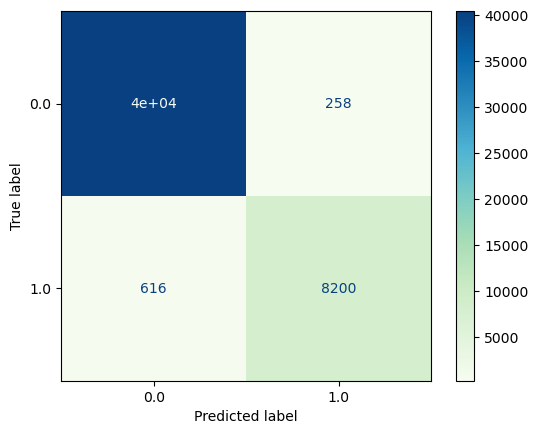

In [23]:
Knn_PS, Knn_RS, Knn_F1, Knn_AS, Knn_BS = run_experiment(knn)

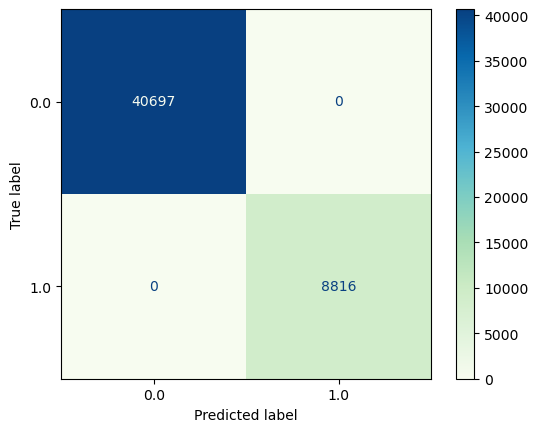

In [24]:
DT_PS, DT_RS, DT_F1, DT_AS, DT_BS = run_experiment(DT)

In [25]:
SVM_PS, SVM_RS, SVM_F1, SVM_AS, SVM_BS = run_experiment(SVM)

NameError: name 'SVM' is not defined

C:\Users\fsassi\AppData\Local\Temp\ipykernel_37444\1651861301.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


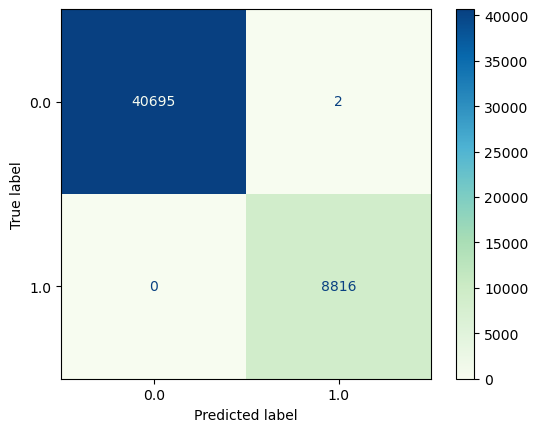

In [22]:
RF_PS, RF_RS, RF_F1, RF_AS, RF_BS = run_experiment(RF)

In [ ]:
print('Model \t PS \t RS \t F1 \t AS')
print(f'Knn \t {Knn_PS} \t {Knn_RS} \t {Knn_F1} \t {Knn_AS} \t {Knn_BS}')
print(f'DT \t {DT_PS} \t {DT_RS} \t {DT_F1} \t {DT_AS} \t {DT_BS}')
print(f'SVM \t {SVM_PS} \t {SVM_RS} \t {SVM_F1} \t {SVM_AS} \t {SVM_BS}')
print(f'RF \t {RF_PS} \t {RF_RS} \t {RF_F1} \t {RF_AS} \t {RF_BS}')